# 클러스터링을 통한 가격 변동 분석
- 비트코인 종가의 차분 데이터와 거래량의 차분 데이터를 모두 반영한 클러스터를 생성하여, 그 클러스터를 원래 비트코인의 종가 데이터에 색깔별로 plotting 함으로써, 종가 데이터에서 특정 이벤트가 발생하기 전에 어떤 클러스터가 보이는지 분석

In [6]:
# 필요한 라이브러리 설치
# !pip install pyupbit
# 예시 데이터로 사용할 비트코인 데이터를 가져오기 위해 업비트 api 사용

import pyupbit as pu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# 비트코인의 종가와 거래량 데이터 추출(여기서는 300일)
bitcoin = pu.get_ohlcv(ticker="KRW-BTC", interval='day', count=300)[['close', 'volume']]

### 종가의 차분 데이터와 거래량의 차분 데이터로 데이터프레임 재구성
- 그 이유는 차분을 하지 않은 데이터로 클러스터링을 하게 되면, 데이터의 크기별로 군집이 형성되어 데이터의 변동을 제대로 반영하지 못하기 때문

In [7]:
# 차분 데이터 계산
diff_bitcoin = bitcoin.diff()

# 차분으로 인해 NULL 값으로 바뀐 row 제거
diff_bitcoin = diff_bitcoin.iloc[1:]
bitcoin = bitcoin.iloc[1:]

print(diff_bitcoin)

                        close       volume
2022-08-11 09:00:00  187000.0   437.898876
2022-08-12 09:00:00  598000.0  -857.412929
2022-08-13 09:00:00  194000.0 -3998.713600
2022-08-14 09:00:00  -18000.0  1998.867944
2022-08-15 09:00:00  -99000.0   527.609326
...                       ...          ...
2023-06-01 09:00:00 -568000.0  -429.777622
2023-06-02 09:00:00  266000.0  -274.457634
2023-06-03 09:00:00 -201000.0 -1203.816885
2023-06-04 09:00:00  -23000.0  -245.775013
2023-06-05 09:00:00 -437000.0   599.338939

[299 rows x 2 columns]


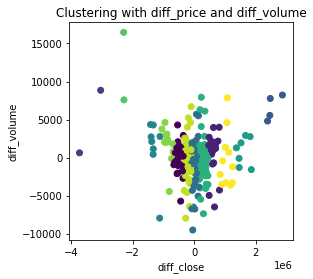

In [8]:
# K-means 클러스터링

k = 12  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=k)
kmeans.fit(diff_bitcoin)

# 클러스터 할당 결과
labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(4, 4))
plt.scatter(diff_bitcoin['close'], diff_bitcoin['volume'], c=labels, cmap='viridis')
plt.xlabel('diff_close')
plt.ylabel('diff_volume')
plt.title('Clustering with diff_price and diff_volume')

# 클러스터 결과를 원래 데이터프레임에 추가
bitcoin['label'] = labels

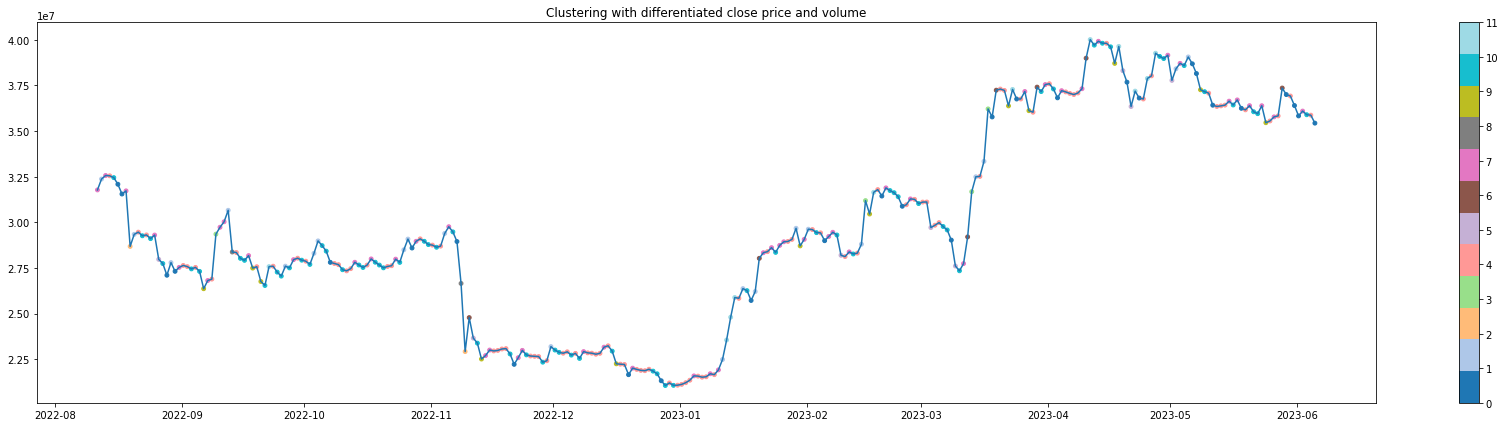

In [9]:
# 비트코인 종가 데이터 그래프
plt.figure(figsize=(30, 7))
plt.plot(bitcoin.close)
plt.title('Bitcoin Close Price')

# 클러스터링 결과를 색상으로 표시
colors = plt.cm.get_cmap('tab20', k)

plt.scatter(bitcoin.index, bitcoin.close, c=labels, cmap=colors, s=15)
plt.colorbar(ticks=np.arange(k))
plt.title('Clustering with differentiated close price and volume')
plt.show()

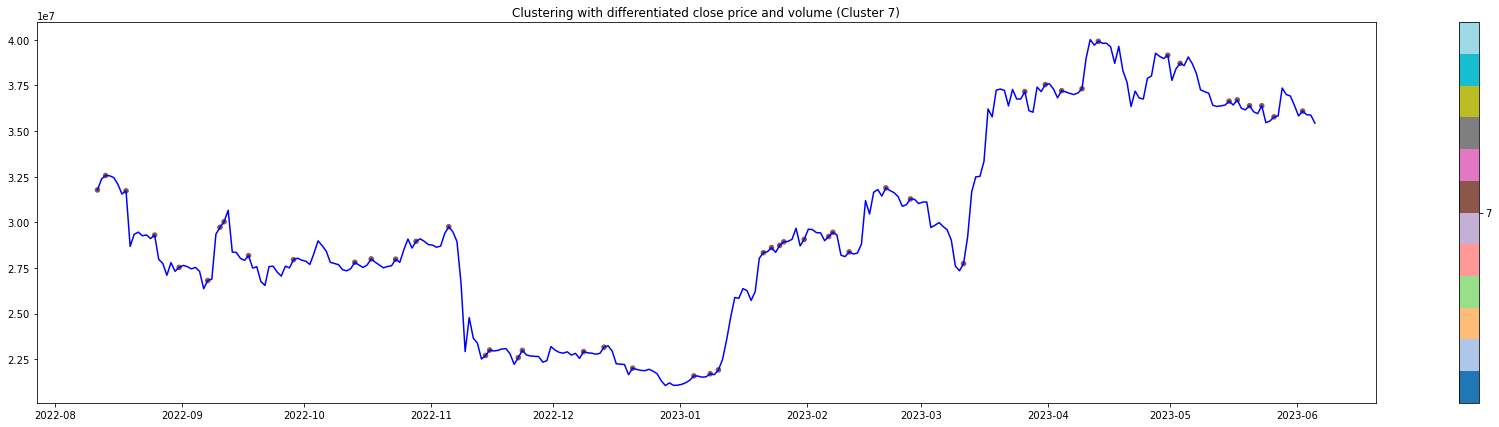

In [10]:
# 비트코인 종가 데이터 그래프
plt.figure(figsize=(30, 7))
plt.plot(bitcoin.close, color='blue')
plt.title('Bitcoin Close Price')

# 클러스터링 결과를 색상과 크기로 표시
colors = plt.cm.get_cmap('tab20', k)

# 특정 클러스터 데이터 포인트만 선택하여 그리기
cluster_number = 7

mask = labels == cluster_number
plt.scatter(bitcoin.index[mask], bitcoin.close[mask], c=labels[mask], cmap=colors, s=20)

plt.colorbar(ticks=np.arange(k))
plt.title(f'Clustering with differentiated close price and volume (Cluster {cluster_number})')
plt.show()